In [1]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path +'life_expectancy.csv'

life = pd.read_csv(file)
print(life.head(3))

       Country  Year      Status  ...  Thinness 5-9 years  Income composition of resources  Schooling
0  Afghanistan  2015  Developing  ...                17.3                            0.479       10.1
1  Afghanistan  2014  Developing  ...                17.5                            0.476       10.0
2  Afghanistan  2013  Developing  ...                17.7                            0.470        9.9

[3 rows x 22 columns]


In [2]:
print('기대수명 데이터의 개요')
print(life.describe())

기대수명 데이터의 개요
              Year  Life expectancy  Adult mortality  ...  Thinness 5-9 years  Income composition of resources    Schooling
count  2938.000000      2928.000000      2928.000000  ...         2904.000000                      2771.000000  2775.000000
mean   2007.518720        69.224932       164.796448  ...            4.870317                         0.627551    11.992793
std       4.613841         9.523867       124.292079  ...            4.508882                         0.210904     3.358920
min    2000.000000        36.300000         1.000000  ...            0.100000                         0.000000     0.000000
25%    2004.000000        63.100000        74.000000  ...            1.500000                         0.493000    10.100000
50%    2008.000000        72.100000       144.000000  ...            3.300000                         0.677000    12.300000
75%    2012.000000        75.700000       228.000000  ...            7.200000                         0.779000    14.30

In [3]:
print('life 데이터의 컬럼들')
print(life.columns)

life 데이터의 컬럼들
Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


<AxesSubplot:>

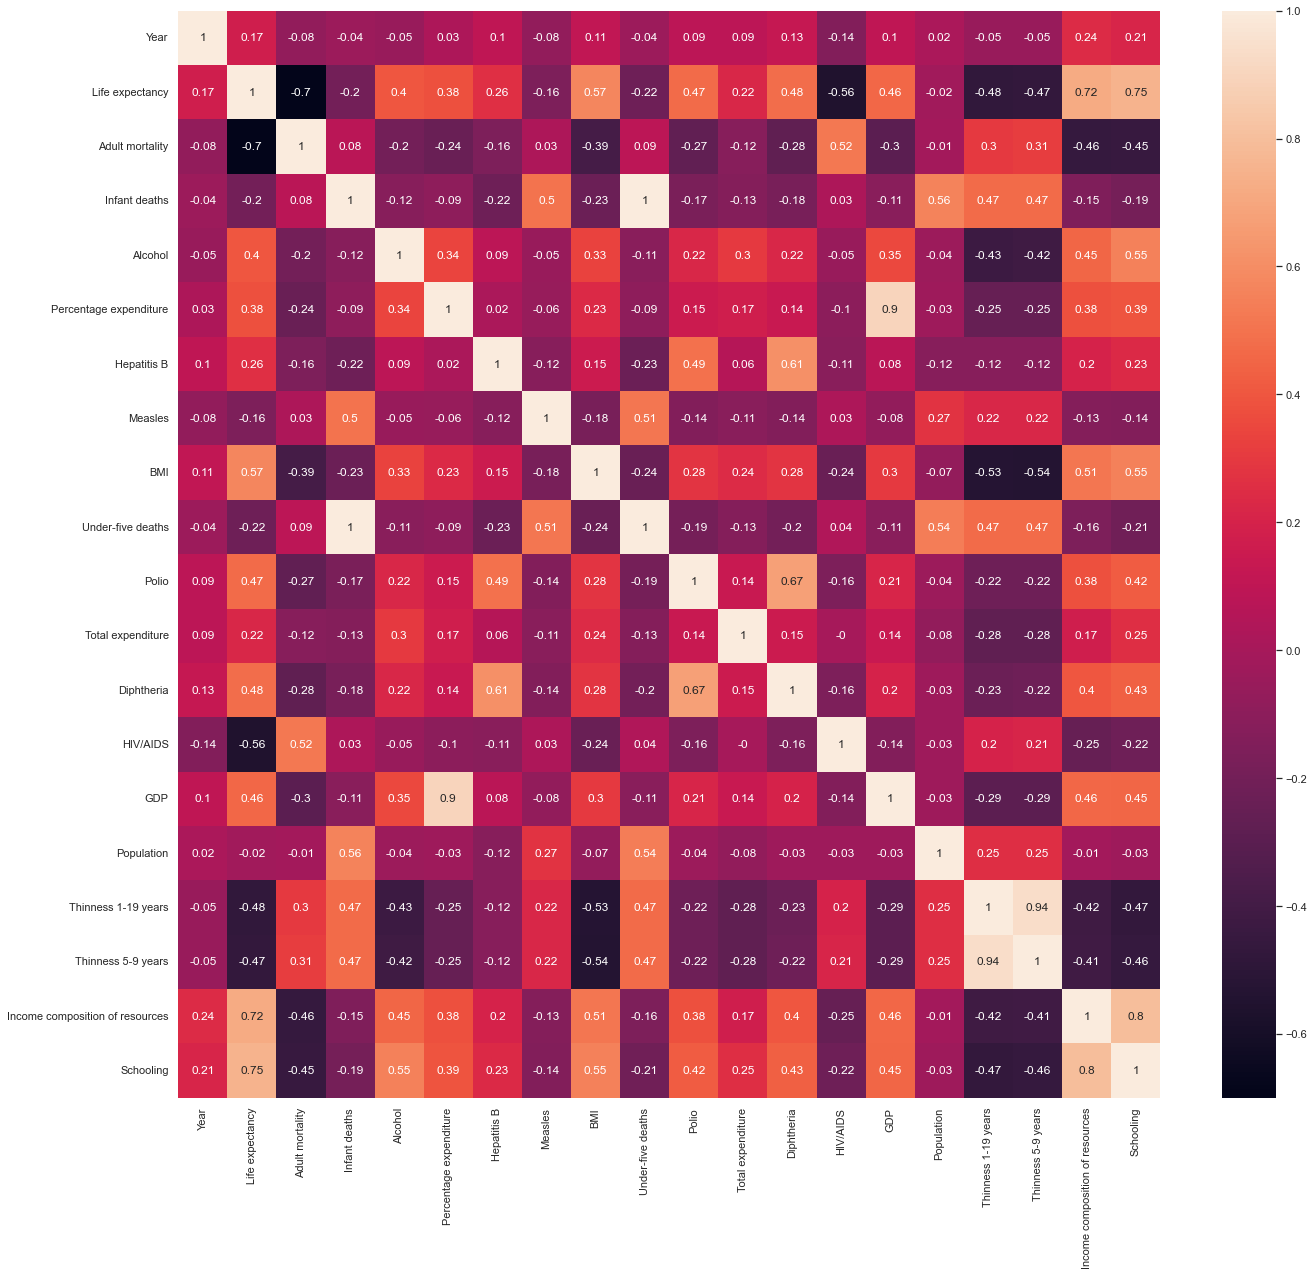

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시본 라이브러리의 크기를 지정
sns.set(rc={'figure.figsize':(22, 20)})
correlation_matrix = life.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [5]:
print('기대수명과 상관계수')
print(life.corr().round(3)['Life expectancy'])

기대수명과 상관계수
Year                               0.170
Life expectancy                    1.000
Adult mortality                   -0.696
Infant deaths                     -0.197
Alcohol                            0.405
Percentage expenditure             0.382
Hepatitis B                        0.257
Measles                           -0.158
BMI                                0.568
Under-five deaths                 -0.223
Polio                              0.466
Total expenditure                  0.218
Diphtheria                         0.479
HIV/AIDS                          -0.557
GDP                                0.461
Population                        -0.022
Thinness 1-19 years               -0.477
Thinness 5-9 years                -0.472
Income composition of resources    0.725
Schooling                          0.752
Name: Life expectancy, dtype: float64


In [7]:
import numpy as np

# 'life expectancy'와 다른 속성들이 소수점 둘째 자리 상관계수를 구함
c = life.corr().round(2)['Life expectancy']
c = np.abs(c)    # 상관게수의 절대값을 취한다
print(c.sort_values(ascending=False)[1:8])  # 상위 7개 값을 출력

Schooling                          0.75
Income composition of resources    0.72
Adult mortality                    0.70
BMI                                0.57
HIV/AIDS                           0.56
Thinness 1-19 years                0.48
Diphtheria                         0.48
Name: Life expectancy, dtype: float64


In [8]:
print('Life expectancy와 상관도 순서로 정렬 후 하위 5개 값')
print(c.sort_values(ascending=False)[-6:-1])  # 하위 5개 슬라이싱

Life expectancy와 상관도 순서로 정렬 후 하위 5개 값
Under-five deaths    0.22
Total expenditure    0.22
Infant deaths        0.20
Year                 0.17
Measles              0.16
Name: Life expectancy, dtype: float64


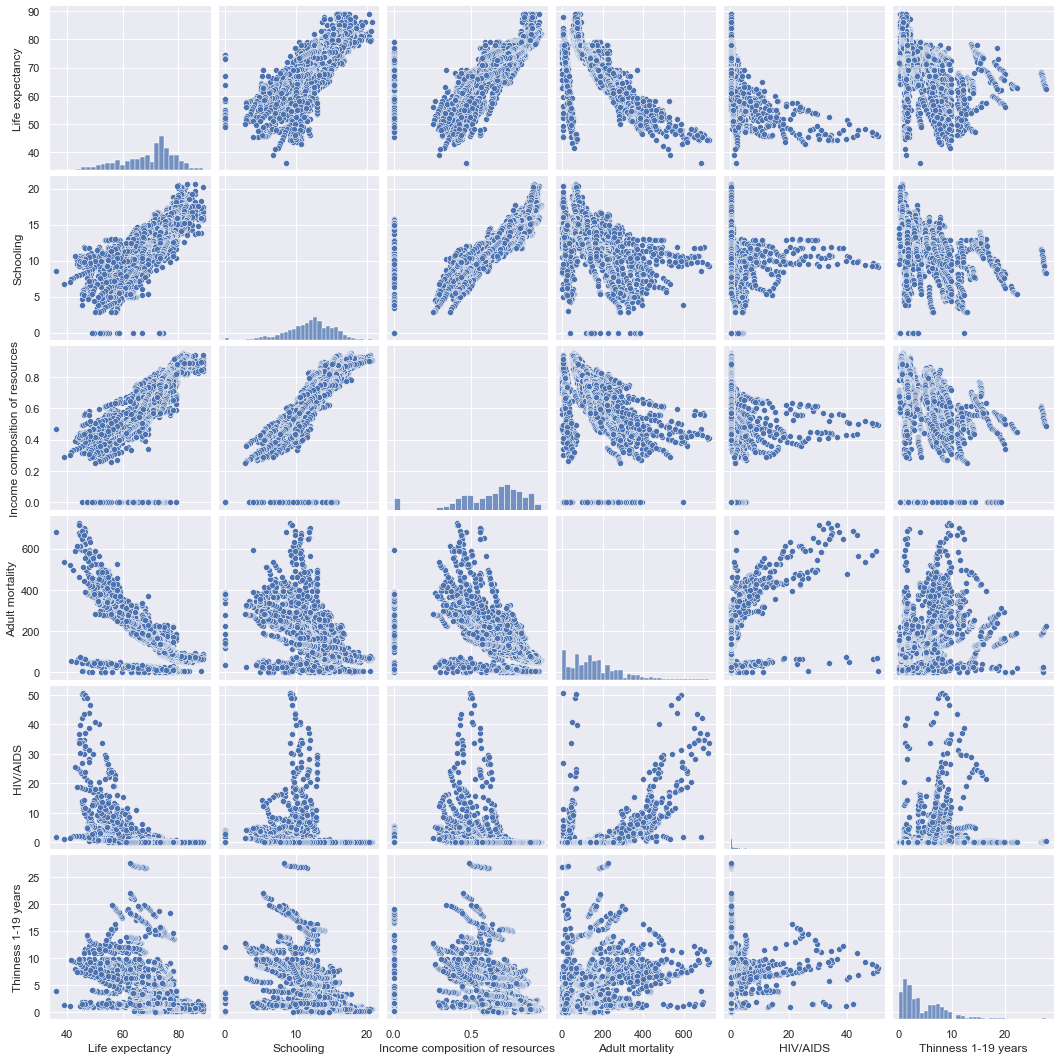

In [10]:
sns.pairplot(life[['Life expectancy', 'Schooling',\
                  'Income composition of resources',\
                  'Adult mortality', 'HIV/AIDS',\
                  'Thinness 1-19 years']])
plt.show()

In [11]:
life[['Schooling', 'Income composition of resources',\
      'Adult mortality', 'HIV/AIDS',\
      'Thinness 1-19 years']].isna().sum()

Schooling                          163
Income composition of resources    167
Adult mortality                     10
HIV/AIDS                             0
Thinness 1-19 years                 34
dtype: int64

In [13]:
life.dropna(inplace=True)   # 결측값 제거

x = life[['Schooling', 'Income composition of resources',\
              'Adult mortality', 'HIV/AIDS', 'Thinness 1-19 years']]
y = life['Life expectancy']

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,\
                                                   test_size = 0.2)
regr = LinearRegression()
regr.fit(x_train, y_train)
print('선형 회귀 모델의 점수 =', regr.score(x_test, y_test).round(3))

선형 회귀 모델의 점수 = 0.796


In [16]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path +'life_expectancy.csv'
life = pd.read_csv(file)

life.dropna(inplace=True)  # 결측값 제거
# 'Country', 'Status', 'Life expectancy'를 제외한 속성 사용
X = life[['Year', 'Adult mortality', 'Infant deaths', 'Alcohol',\
          'Percentage expenditure', 'Hepatitis B', 'Measles',\
          'BMI', 'Under-five deaths', 'Polio',\
          'Total expenditure', 'Diphtheria', 'HIV/AIDS','GDP',\
          'Population','Thinness 1-19 years','Thinness 5-9 years',\
          'Income composition of resources', 'Schooling']]
y = life['Life expectancy']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                   test_size = 0.2)
regr = LinearRegression()
regr.fit(X_train, y_train)
print('선형 회귀 모델의 점수 =', regr.score(X_test, y_test).round(3))

선형 회귀 모델의 점수 = 0.832


Text(0, 0.5, 'Correlation Coef')

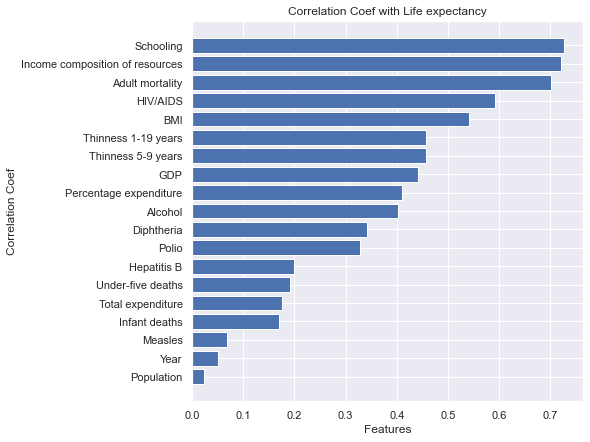

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path +'life_expectancy.csv'

life = pd.read_csv(file)
life.dropna(inplace=True)  # 결측값 제거
# 'Country', 'Status', 'Life expectancy'를 제외한 속성 사용
X = life[['Year', 'Adult mortality', 'Infant deaths', 'Alcohol',\
          'Percentage expenditure', 'Hepatitis B', 'Measles',\
          'BMI', 'Under-five deaths', 'Polio',\
          'Total expenditure', 'Diphtheria', 'HIV/AIDS','GDP',\
          'Population','Thinness 1-19 years','Thinness 5-9 years',\
          'Income composition of resources', 'Schooling']]

# 'Life expectancy'와 다른 속성들의 상관계수를 구함
c = life.corr()['Life expectancy']
c = np.abs(c)    # 상관게수의 절대값을 취한다
c.sort_values(ascending=True, inplace=True)
c = c[:-1]  # 제일 뒤에 있는 Life expectancy는 제거
plt.figure(figsize=(7,7))
plt.barh(c.index, c.values)
plt.title('Correlation Coef with Life expectancy')
plt.xlabel('Features')
plt.ylabel('Correlation Coef')